<a href="https://colab.research.google.com/github/ArthSol/Data-Science-Final-Project-/blob/main/Analyzing_Historical_Stock_Revenue_Data_and_Building_a_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")

revenue_table = None
for table in tables:
    if "Revenue" in str(table):
        revenue_table = table
        break

if revenue_table is None:
    print("⚠️ Revenue table not found. The website structure might have changed.")
else:
    tesla_revenue = pd.read_html(str(revenue_table))[0]
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue.dropna(inplace=True)

    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '').astype(float)

    print(tesla_revenue.tail())


⚠️ Revenue table not found. The website structure might have changed.


In [10]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
print("✅ Tesla Stock Data (First 5 Rows):")
print(tesla_data.head())

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

revenue_table = None
for table in tables:
    if "Revenue" in str(table):
        revenue_table = table
        break

if revenue_table:
    tesla_revenue = pd.read_html(str(revenue_table))[0]
    tesla_revenue.columns = ["Date", "Revenue"]
    tesla_revenue.dropna(inplace=True)
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',', '').astype(float)
    print("\n✅ Tesla Revenue Data (Last 5 Rows):")
    print(tesla_revenue.tail())
else:
    print("⚠️ Revenue table not found!")

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

print("\n✅ GameStop Stock Data (First 5 Rows):")
print(gme_data.head())

✅ Tesla Stock Data (First 5 Rows):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  
⚠️ Revenue table not found!

✅ GameStop Stock Data (First 5 Rows):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  

In [14]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

response = requests.get(url, timeout=10)
soup = BeautifulSoup(response.content, 'html.parser')

tables = soup.find_all("table")

revenue_table = None
for table in tables:
    if "Revenue" in str(table):
        revenue_table = table
        break

if revenue_table:
    gme_revenue = pd.read_html(str(revenue_table))[0]
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue.dropna(inplace=True)

    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',', '').astype(float)

    print("\n✅ GameStop Revenue Data (Last 5 Rows):")
    print(gme_revenue.tail())

else:
    print("⚠️ Revenue table not found. The website structure might have changed.")



⚠️ Revenue table not found. The website structure might have changed.


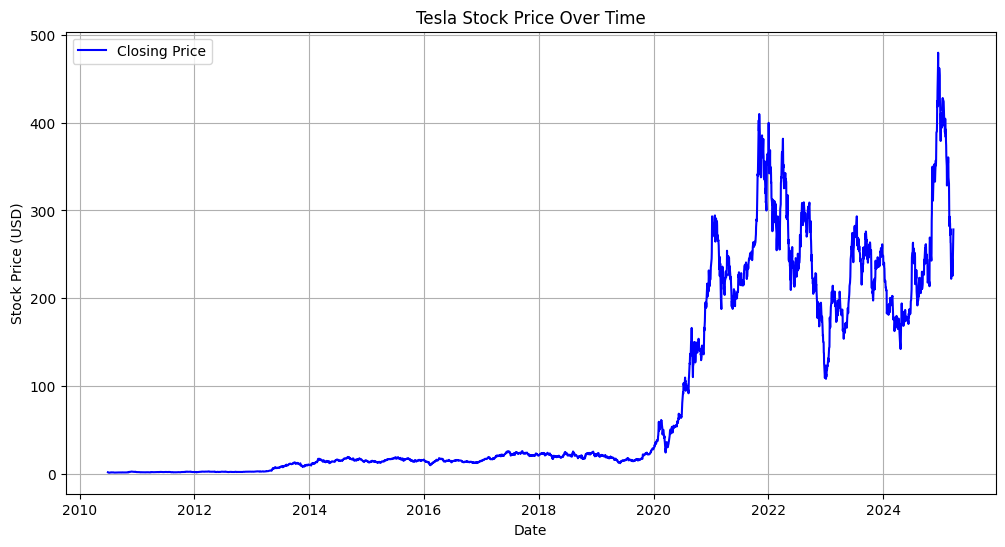

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Closing Price", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

make_graph(tesla_data, "Tesla Stock Price Over Time")



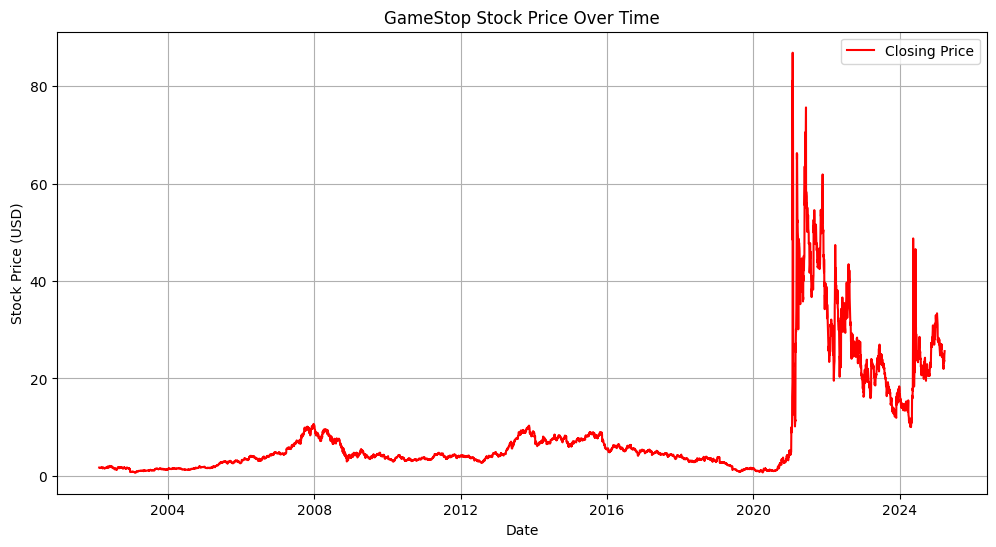

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Closing Price", color='red')
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
make_graph(gme_data, "GameStop Stock Price Over Time")
